In [2]:
"""
Notebook for random forest
"""

'\nNotebook for random forest\n'

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd

In [4]:
# Access the training, cv and test data
train_data = pd.read_excel('../../data/preprocessed/train_data.xlsx')
cv_data = pd.read_excel('../../data/preprocessed/cv_data.xlsx')
test_data = pd.read_excel('../../data/preprocessed/test_data.xlsx')

In [5]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
train_data = imputer.fit_transform(train_data)
cv_data = imputer.transform(cv_data)
test_data = imputer.transform(test_data)

In [6]:
# split into X and y
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_cv = cv_data[:, 1:]
y_cv = cv_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [7]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
# Train the model using the training set
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions on the train set
y_train_pred = rf_model.predict(X_train)

# Evaluate the model on the train set
print('Train accuracy score: ', accuracy_score(y_train, y_train_pred))

Train accuracy score:  0.9983525535420099


In [10]:
# Make predictions on the validation set
cv_predictions = rf_model.predict(X_cv)

# Evaluate the model on the validation set
cv_accuracy = accuracy_score(y_cv, cv_predictions)
print(f"Validation Accuracy: {cv_accuracy}")

Validation Accuracy: 0.8762376237623762


In [11]:
# Make predictions on the test set
test_predictions = rf_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8712871287128713


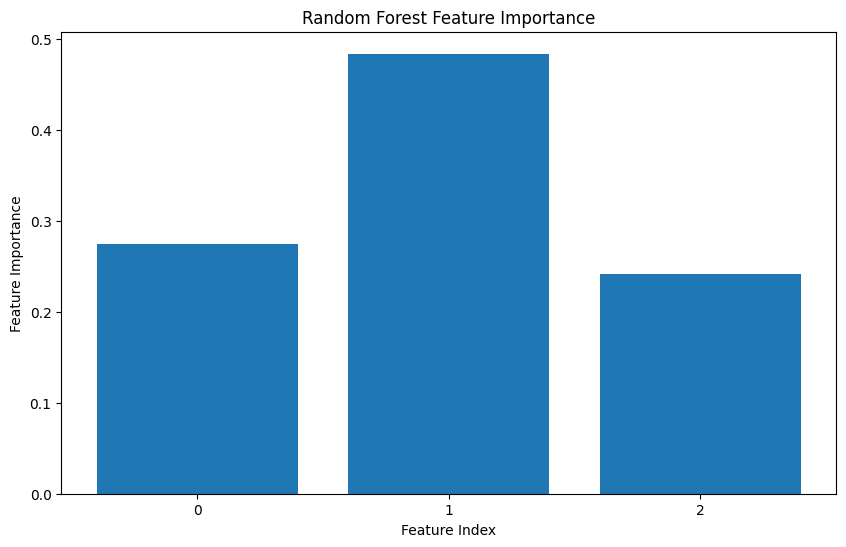

In [12]:
# Feature importance plot
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align="center")
plt.xticks(range(len(importances)), range(len(importances)))
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

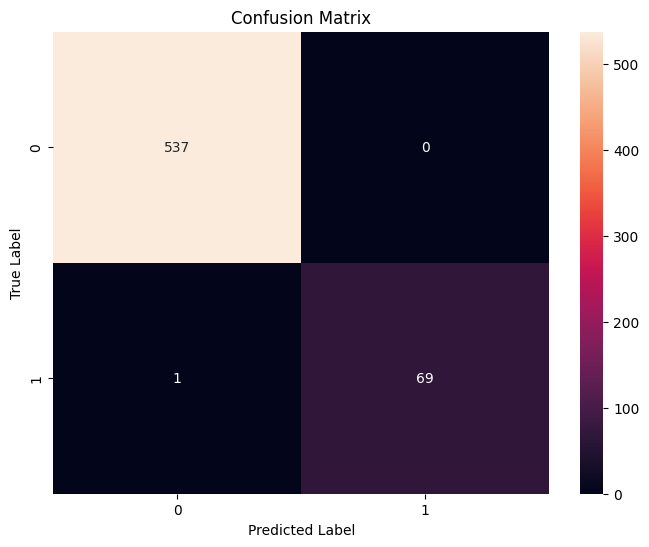

In [16]:
# Confusion matrix plot
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()